1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

[[ 0.19625743 -9.56992509 -9.17741023]
 [ 0.79378268 -3.386641   -1.79907563]
 [-0.82891621  0.64655314 -1.01127929]
 ...
 [-1.05717871  1.59008759 -0.52426984]
 [-0.66392655  1.84768255  0.51982944]
 [-1.06050452  1.08368896 -1.03732007]]
Covariance matrix is:
 [[-0.11290652 -0.81649658  0.56620266]
 [-0.58054728 -0.40824829 -0.70448434]
 [-0.80636033  0.40824829  0.42792097]] 

Eigenvalues are:
 [ 2.62351461e+01 -7.67059379e-16  2.02687976e+00] 

Eigenvectors are :
 [[-0.11290652 -0.81649658  0.56620266]
 [-0.58054728 -0.40824829 -0.70448434]
 [-0.80636033  0.40824829  0.42792097]] 

VV^T:
 [[ 1.00000000e+00  1.46356007e-16  2.77940406e-18]
 [ 1.46356007e-16  1.00000000e+00 -4.44411798e-17]
 [ 2.77940406e-18 -4.44411798e-17  1.00000000e+00]] 

Covariance matrix:
 [[-0.11291939 -0.58053127 -0.80637005]
 [ 0.56620009 -0.70449754  0.42790265]
 [-0.81649658 -0.40824829  0.40824829]] 

Eigenvalues:
 [1.61917911e+02 4.49987603e+01 7.56009448e-15] 

Eigenvectors:
 [[ 7.98791692e-02  6.50256

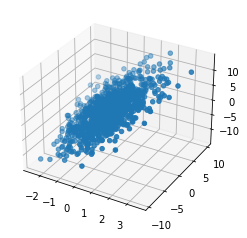

In [20]:
#1st part
import matplotlib.pyplot as plt
import pandas as pd

from scipy import linalg as la
from matplotlib import pyplot as plt
import numpy as np
n = 1000

s1 = np.random.normal(0, 1, n).T
s2 = (np.random.normal(0, 3, n) +s1).T
s3 = (2*s1+s2)
X = np.array([s1, s2, s3]).T
print(X)

#2nd part
Mean = np.mean(X.T, axis=1)
Cmat = X - Mean
covarience = np.cov(Cmat.T)

l, V = la.eig(covarience)
l = np.real_if_close(l)

print("Covariance matrix is:\n", V, '\n')
print("Eigenvalues are:\n", l, '\n')
print("Eigenvectors are :\n", V, '\n')

print("VV^T:\n", V.dot(V.T), '\n')

#3rd part

U, s, VT = la.svd(X)
print("Covariance matrix:\n", VT, '\n')
print("Eigenvalues:\n", s, '\n')
print("Eigenvectors:\n", U, '\n')


#4th part


from mpl_toolkits.mplot3d import Axes3D

xs = s1

ys = s2

zs = s3

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs,ys,zs)




2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [21]:
noise = np.random.normal(loc=0, scale=20, size=1000)
noise_df=pd.DataFrame(noise)
# adding noise to the dataframe
df=pd.DataFrame(X)
newX= df.replace(noise)
print("new noise added dataset is:\n", newX, '\n')

newcov = np.cov(newX)
print("Covariance matrix:\n", newcov, '\n')
l1, V1 = la.eig(newcov)
l1 = np.real_if_close(l1)

U1, s1, Vt1 = la.svd(newX)
l_svd1 = s1**2 / (n-1)
V_svd1 = U1

print("Eigenvalues are:", l1)
print("Eigenvectors are ",V1)
print('Eigenvalues:\n',l_svd1)
print('Eigenvectors:\n', V_svd1)


compo = (np.sum(l[:-1])*100/np.sum(l))
compoo = (np.sum(l[0])*100/np.sum(l))
print("\nPercent of the total variability dataset of component 0 and 1 is ", compo, "%,", "and component 0 is ", compoo, "%")

new noise added dataset is:
             0         1         2
0    0.196257 -9.569925 -9.177410
1    0.793783 -3.386641 -1.799076
2   -0.828916  0.646553 -1.011279
3   -1.892852 -1.915539 -5.701243
4    0.752144 -1.687893 -0.183605
..        ...       ...       ...
995  0.039800 -2.521773 -2.442174
996  0.435552 -2.463573 -1.592470
997 -1.057179  1.590088 -0.524270
998 -0.663927  1.847683  0.519829
999 -1.060505  1.083689 -1.037320

[1000 rows x 3 columns] 

Covariance matrix:
 [[30.56633905 10.95908597 -2.22516933 ... -5.27981889 -6.0243617
  -3.66507263]
 [10.95908597  4.45320337 -1.38786046 ... -2.63418877 -2.61282589
  -2.06516528]
 [-2.22516933 -1.38786046  0.82644574 ...  1.21900462  0.9485478
   1.11262355]
 ...
 [-5.27981889 -2.63418877  1.21900462 ...  1.96041968  1.68121471
   1.6955296 ]
 [-6.0243617  -2.61282589  0.9485478  ...  1.68121471  1.57877539
   1.37153484]
 [-3.66507263 -2.06516528  1.11262355 ...  1.6955296   1.37153484
   1.51613042]] 

Eigenvalues are: [ 3.394

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

new noise added dataset is:
             0         1         2
0    0.624729  3.682656  4.932114
1    1.076206 -0.019947  2.132466
2    0.338863 -4.590861 -3.913136
3   -0.216273 -0.483982 -0.916528
4   -0.309475 -1.820573 -2.439523
..        ...       ...       ...
995 -0.254591 -7.149632 -7.658815
996  1.310504 -0.609081  2.011927
997  0.582668  6.306151  7.471488
998  0.161741 -1.157917 -0.834435
999  1.000688  0.583649  2.585025

[1000 rows x 3 columns] 

Covariance matrix:
 [[ 4.9109384   0.64785139 -5.42382439 ...  8.10513847 -1.32035907
   1.34161777]
 [ 0.64785139  1.15835249  0.39520992 ...  0.58514266  0.1817655
   1.07306643]
 [-5.42382439  0.39520992  7.14016367 ... -9.45277695  1.82675323
  -0.55405424]
 ...
 [ 8.10513847  0.58514266 -9.45277695 ... 13.59534886 -2.33975815
   1.80992826]
 [-1.32035907  0.1817655   1.82675323 ... -2.33975815  0.47308399
  -0.06341987]
 [ 1.34161777  1.07306643 -0.55405424 ...  1.80992826 -0.06341987
   1.11492572]] 

Eigenvalues are: [ 3.52